# Analiza wrażliwości dla metody Longstaffa-Schwartza
Ten notebook implementuje metodę Longstaffa-Schwartza do wyceny opcji amerykańskich i przeprowadza analizę wrażliwości na kluczowe parametry.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Funkcja wyceny Longstaffa-Schwartza
def longstaff_schwartz(S0, K, r, sigma, T, M, N, poly_degree):
    dt = T / M
    discount = np.exp(-r * dt)
    # Symulacja ścieżek
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for t in range(1, M + 1):
        Z = np.random.randn(N)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    # Payoff przy wygaśnięciu
    payoff = np.maximum(K - S[:, -1], 0)
    cashflow = payoff.copy()
    # Backward induction
    for t in range(M - 1, 0, -1):
        itm = np.where(K - S[:, t] > 0)[0]
        if len(itm) > 0:
            X = S[itm, t].reshape(-1, 1)
            Y = cashflow[itm] * discount
            pf = PolynomialFeatures(poly_degree)
            X_poly = pf.fit_transform(X)
            model = LinearRegression().fit(X_poly, Y)
            cont_value = model.predict(X_poly)
            exer = np.where((K - S[itm, t]) > cont_value)[0]
            exer_idx = itm[exer]
            cashflow[exer_idx] = K - S[exer_idx, t]
        cashflow = cashflow * discount
    return np.mean(cashflow) * discount


In [78]:
# Parametry bazowe
params = {
    'S0': 100, 'K': 100, 'r': 0.05, 'sigma': 0.2,
    'T': 1, 'M': 50, 'N': 10000, 'poly_degree': 2
}
price = longstaff_schwartz(**params)
print("Cena opcji (przypadek bazowy):", price)

Cena opcji (przypadek bazowy): 6.11710993176321


In [79]:
# Funkcja do analizy wrażliwości
def sensitivity_analysis(param_name, values):
    results = []
    for v in values:
        p = params.copy()
        p[param_name] = v
        results.append(longstaff_schwartz(**p))
    return results

# Przykładowe zakresy dla kilku parametrów
sensitivity_results = {
    'poly_degree': sensitivity_analysis('poly_degree', [1, 2, 3, 4, 5, 6 ,7 ,8,9,10,12,15,20]),
    'N (liczba ścieżek)': sensitivity_analysis('N', [1000, 5000, 10000, 20000]),
    'sigma (zmienność)': sensitivity_analysis('sigma', [0.1, 0.2, 0.3, 0.4])
}
sensitivity_results

{'poly_degree': [np.float64(5.922519833733209),
  np.float64(6.173306154597488),
  np.float64(6.055823557177878),
  np.float64(6.1389580872026706),
  np.float64(6.084685515856839),
  np.float64(6.044775753015156),
  np.float64(6.154918162599623),
  np.float64(6.103862550742298),
  np.float64(6.157603505666618),
  np.float64(6.12001357583855),
  np.float64(6.165696348729449),
  np.float64(6.020012424799491),
  np.float64(6.090337724040881)],
 'N (liczba ścieżek)': [np.float64(6.047493931558533),
  np.float64(6.17377647897072),
  np.float64(6.014264829552475),
  np.float64(6.102715228434355)],
 'sigma (zmienność)': [np.float64(2.406336669082286),
  np.float64(6.015418860267602),
  np.float64(9.939255725425241),
  np.float64(13.716133275762994)]}

In [ ]:
# Wykres tornado dla analizy jednoczynnikowej
for label, values in sensitivity_results.items():
    plt.figure()
    plt.plot(values, marker='o')
    plt.title(f"Analiza wrażliwości: {label}")
    plt.xlabel(label)
    plt.ylabel('Cena opcji')
    plt.grid(True)
    plt.show()

NameError: name 'x' is not defined

<Figure size 640x480 with 0 Axes>

In [12]:
# Rozszerzona analiza wrażliwości o kolejne parametry
sensitivity_results.update({
    'r (stopa wolna od ryzyka)': sensitivity_analysis('r', [0.01, 0.03, 0.05, 0.07, 0.10]),
    'K (cena wykonania)':          sensitivity_analysis('K', [80, 90, 100, 110, 120]),
    'T (czas do wygaśnięcia)':     sensitivity_analysis('T', [0.5, 1.0, 1.5, 2.0]),
    'M (liczba kroków na ścieżkę)':sensitivity_analysis('M', [25, 50, 100, 200])
})


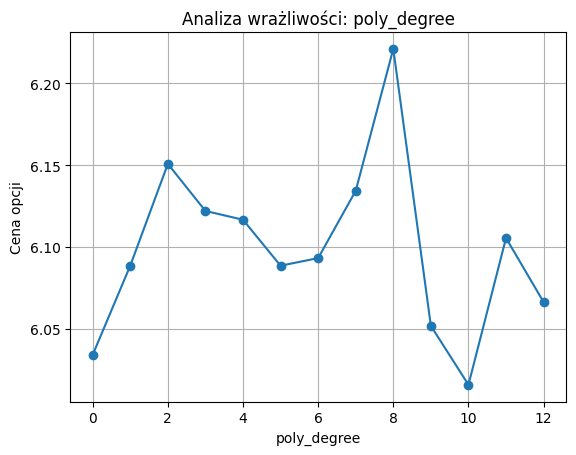

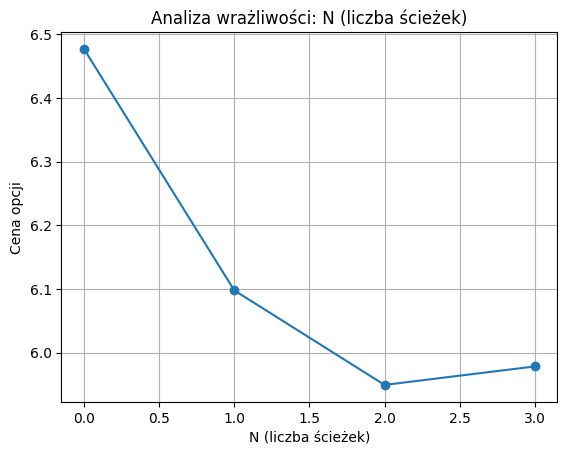

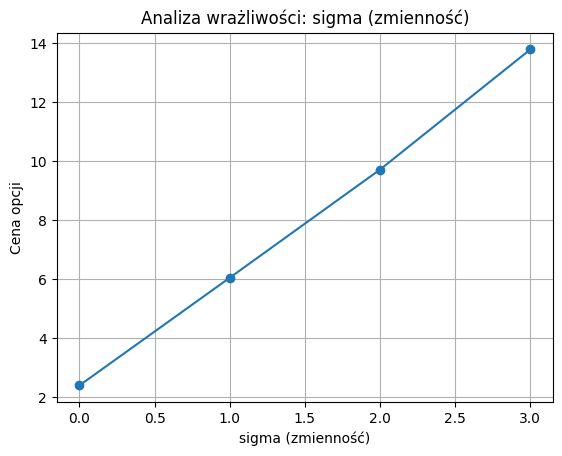

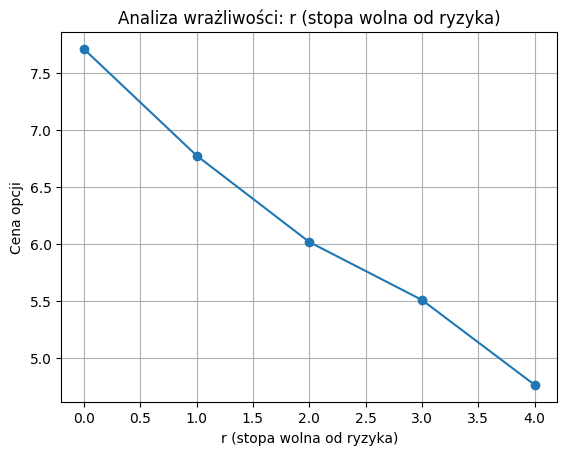

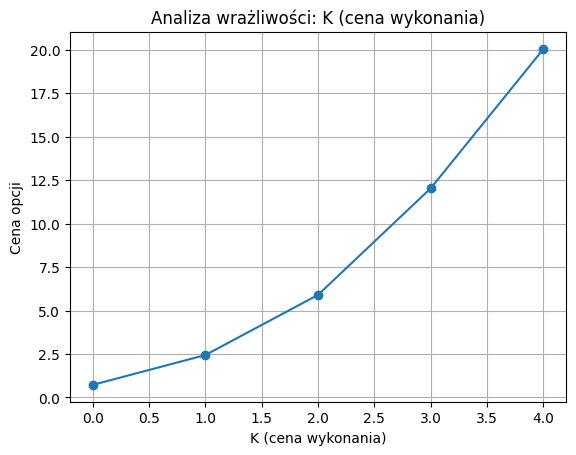

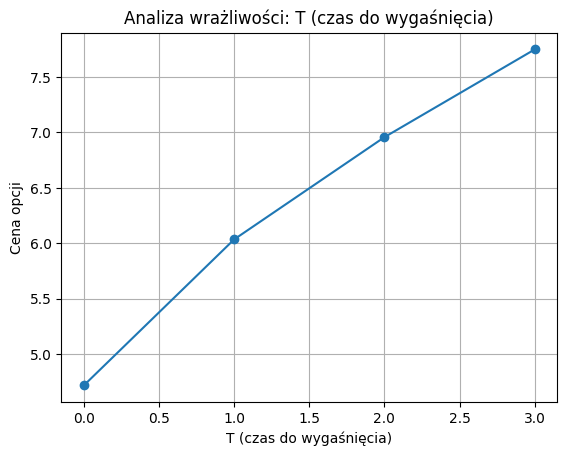

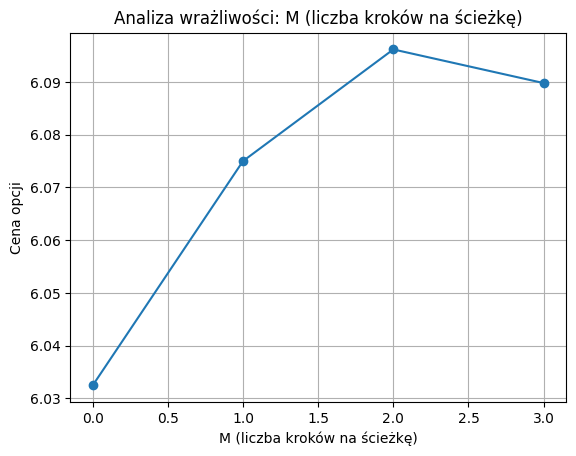

In [ ]:
# Wykres tornado dla wszystkich parametrów
for label, values in sensitivity_results.items():
    plt.figure()
    plt.plot(values, marker='o')
    plt.title(f"Analiza wrażliwości: {label}")
    plt.xlabel(label)
    plt.ylabel('Cena opcji')
    plt.grid(True)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 1) Zakresy parametrów
sensitivity_ranges = {
    'poly_degree':                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20],
    'N (liczba ścieżek)':          [1000, 5000, 10000, 20000],
    'sigma (zmienność)':           [0.1, 0.2, 0.3, 0.4],
    'r (stopa wolna od ryzyka)':   [0.01, 0.03, 0.05, 0.07, 0.10],
    'K (cena wykonania)':          [80, 90, 100, 110, 120],
    'T (czas do wygaśnięcia)':     [0.5, 1.0, 1.5, 2.0],
    'M (liczba kroków na ścieżkę)': [25, 50, 100, 200]
}

# 2) Mapowanie etykiet na nazwy parametrów funkcji
param_map = {
    'poly_degree':                 'poly_degree',
    'N (liczba ścieżek)':          'N',
    'sigma (zmienność)':           'sigma',
    'r (stopa wolna od ryzyka)':   'r',
    'K (cena wykonania)':          'K',
    'T (czas do wygaśnięcia)':     'T',
    'M (liczba kroków na ścieżkę)': 'M'
}

# 3) Obliczamy ceny dla każdego parametru
sensitivity_results = {
    label: sensitivity_analysis(param_map[label], values)
    for label, values in sensitivity_ranges.items()
}

# 4) Rysujemy wykresy dla każdego parametru
for label, prices in sensitivity_results.items():
    x_vals     = sensitivity_ranges[label]
    base_price = prices[0]
    deltas     = [p - base_price for p in prices]
    
    plt.figure(figsize=(8,  max(2, len(x_vals)*0.4)))
    plt.barh(
        y=range(len(x_vals)),
        width=deltas,
        color='skyblue',
        edgecolor='gray'
    )
    plt.yticks(range(len(x_vals)), x_vals)
    plt.axvline(0, color='black', linewidth=0.8)
    
    # adnotacje wartości delty przy słupkach
    for i, delta in enumerate(deltas):
        plt.text(
            delta + 0.01 * (max(deltas) - min(deltas)),
            i,
            f"{delta:.3f}",
            va='center',
            fontsize=8
        )
    
    plt.xlabel('Zmiana ceny opcji względem bazowej')
    plt.title(f"Tornado: analiza wrażliwości dla {label}\n(wartości: {x_vals})")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


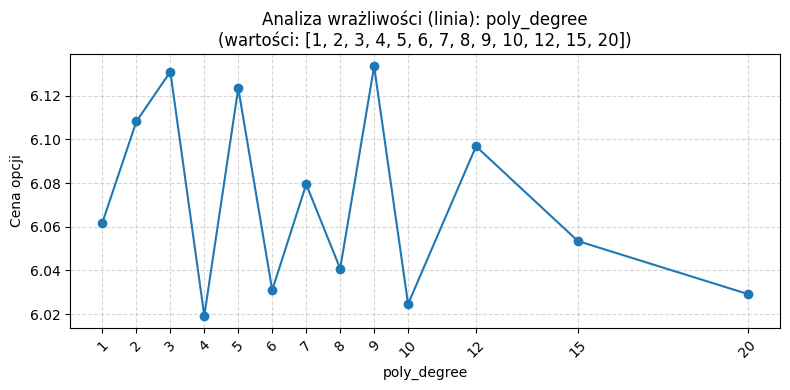

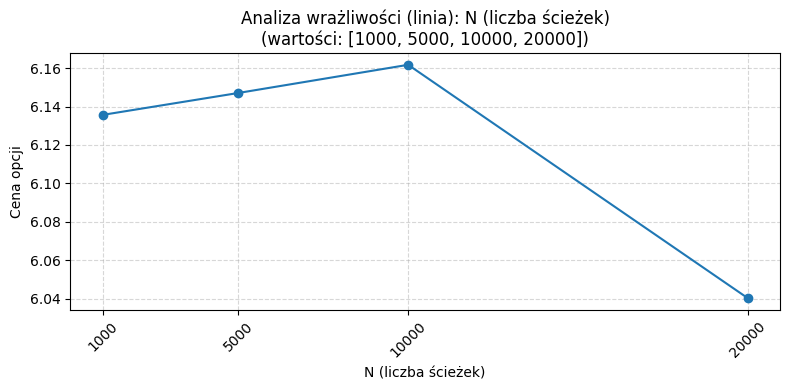

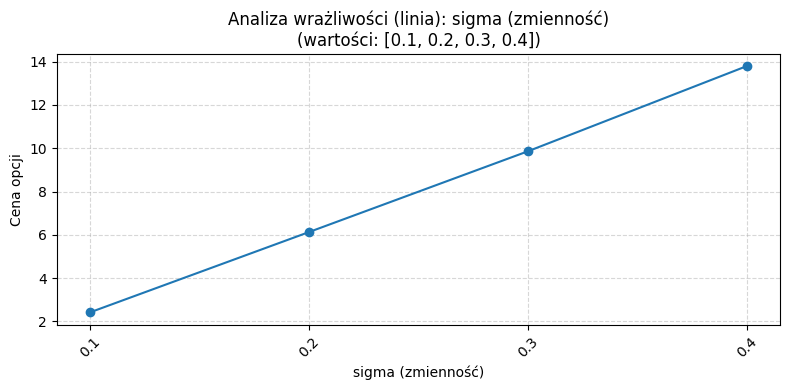

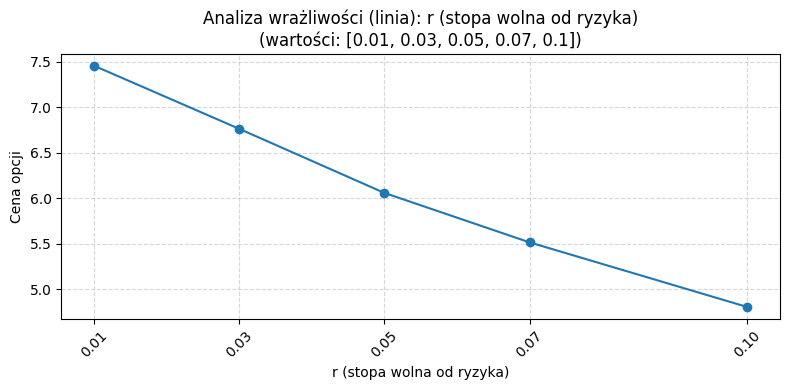

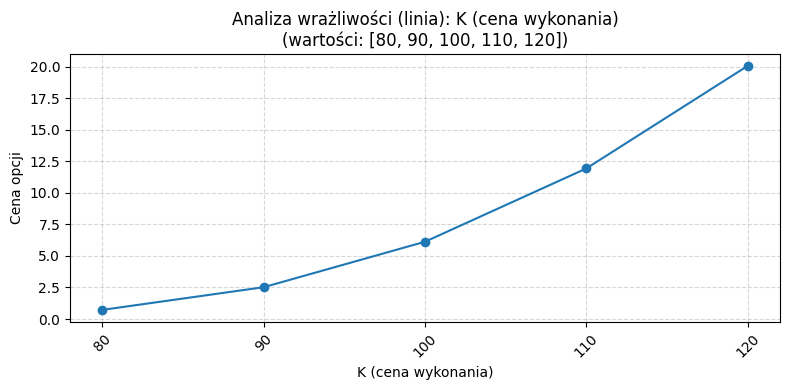

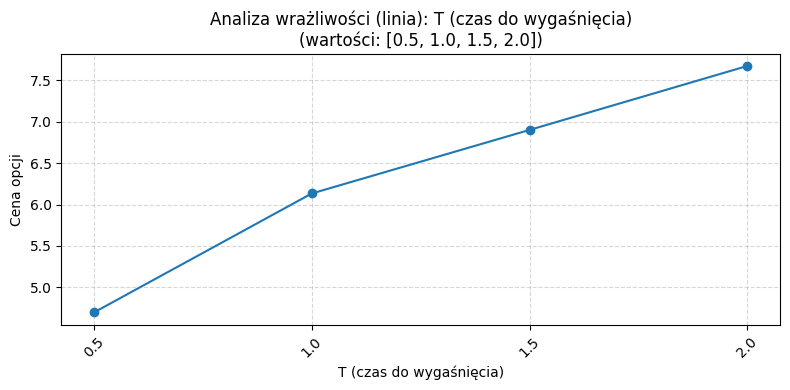

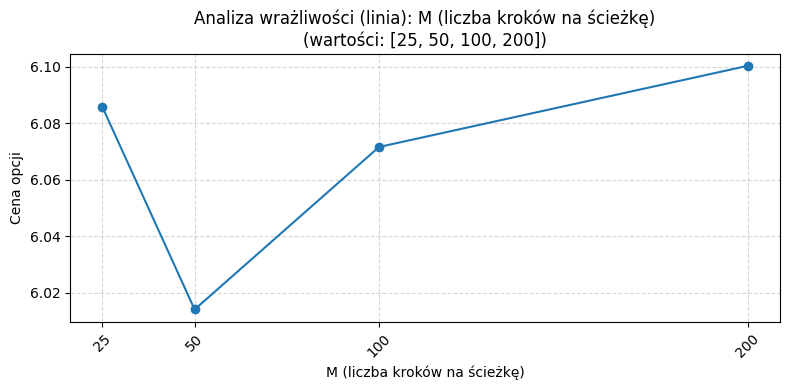

In [86]:
# --- Klasyczne wykresy liniowe analizy wrażliwości (punkty bez podpisów) ---
for label, prices in sensitivity_results.items():
    x_vals = sensitivity_ranges[label]
    
    plt.figure(figsize=(8, 4))
    plt.plot(x_vals, prices, marker='o', linestyle='-')
    
    # pokażemy wszystkie wartości parametru na osi X
    plt.xticks(x_vals, rotation=45)
    
    plt.title(f"Analiza wrażliwości (linia): {label}\n(wartości: {x_vals})")
    plt.xlabel(label)
    plt.ylabel("Cena opcji")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from lsm import _build_basis, _build_basis_with_cross, _build_basis_weighted_laguerre

# ---- (1) Przygotowanie danych: symulacja ścieżek i payoffs ------------------
# parametry
S0, r, sigma = 100, 0.05, 0.2
K = 100
T, M, N = 1.0, 50, 50
dt = T / M
discount = np.exp(-r * dt)

# prosta symulacja GBM (możesz podmienić na swoją funkcję)
np.random.seed(42)
S = np.zeros((N, M+1))
S[:,0] = S0
for t_idx in range(1, M+1):
    Z = np.random.randn(N)
    S[:,t_idx] = S[:,t_idx-1] * np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)

# payoff i cashflow przy wygaśnięciu
payoff = np.maximum(K - S[:,-1], 0)
cashflow = payoff.copy()

# ---- (2) Wybieramy krok t, przygotowujemy punkty ITM --------------------------
t = 25  # punkt w połowie ścieżki
S_t = S[:, t]
intrinsic = np.maximum(K - S_t, 0)
itm_mask = intrinsic > 0
S_itm = S_t[itm_mask].reshape(-1,1)
Y = cashflow[itm_mask] * discount




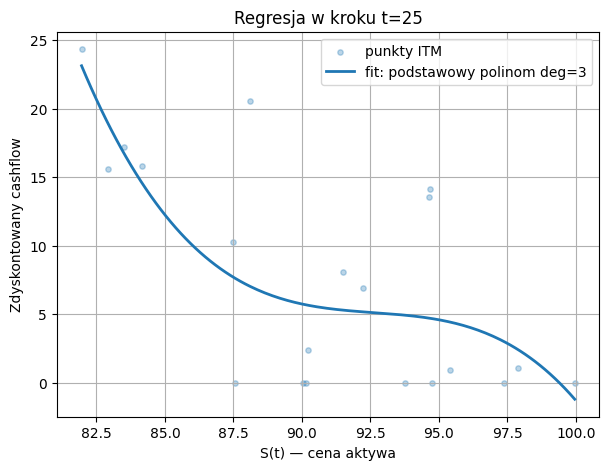

In [59]:
# ---- (3) Budujemy macierz cech X_poly korzystając z lsm.py ------------------
poly_degree = 3
X_poly = _build_basis(S_itm, degree=poly_degree)

# ---- (4) Dopasowanie regresji liniowej i predykcja --------------------------
model = LinearRegression().fit(X_poly, Y)
# do rysunku generujemy gęstą siatkę cen
s_grid = np.linspace(S_itm.min(), S_itm.max(), 200).reshape(-1,1)
# transformujemy siatkę tą samą funkcją
X_grid = _build_basis(s_grid, degree=poly_degree)
y_pred = model.predict(X_grid)

# ---- (5) Rysunek: scatter + krzywa regresji ---------------------------------
plt.figure(figsize=(7,5))
plt.scatter(S_itm, Y, s=15, alpha=0.3, label='punkty ITM')
plt.plot(s_grid, y_pred, linewidth=2, label=f'fit: podstawowy polinom deg={poly_degree}')
plt.title(f"Regresja w kroku t={t}")
plt.xlabel("S(t) — cena aktywa")
plt.ylabel("Zdyskontowany cashflow")
plt.legend()
plt.grid(True)
plt.show()


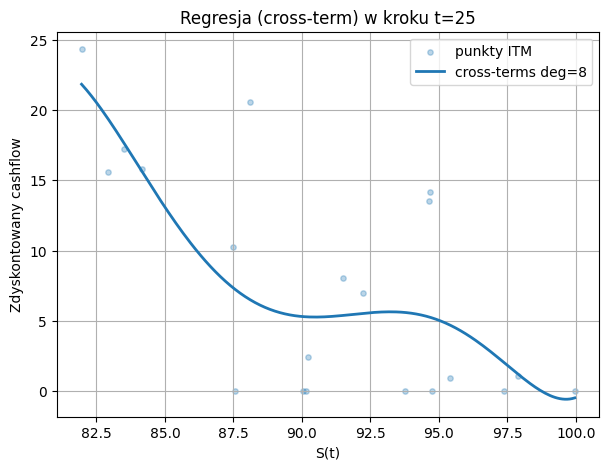

In [29]:

poly_degree = 8
# 1) Budowa macierzy cech dla punktów ITM
X_itm_cross = _build_basis_with_cross(S_itm, degree=poly_degree)
# 2) Dopasowanie modelu
model_cross = LinearRegression().fit(X_itm_cross, Y)
# 3) Predykcja na gęstej siatce cen
s_grid = np.linspace(S_itm.min(), S_itm.max(), 200).reshape(-1,1)
X_grid_cross = _build_basis_with_cross(s_grid, degree=poly_degree)
y_pred_cross = model_cross.predict(X_grid_cross)

# 4) Rysunek
plt.figure(figsize=(7,5))
plt.scatter(S_itm, Y, s=15, alpha=0.3, label='punkty ITM')
plt.plot(s_grid, y_pred_cross, linewidth=2, label=f'cross-terms deg={poly_degree}')
plt.title(f"Regresja (cross-term) w kroku t={t}")
plt.xlabel("S(t)")
plt.ylabel("Zdyskontowany cashflow")
plt.legend()
plt.grid(True)
plt.show()


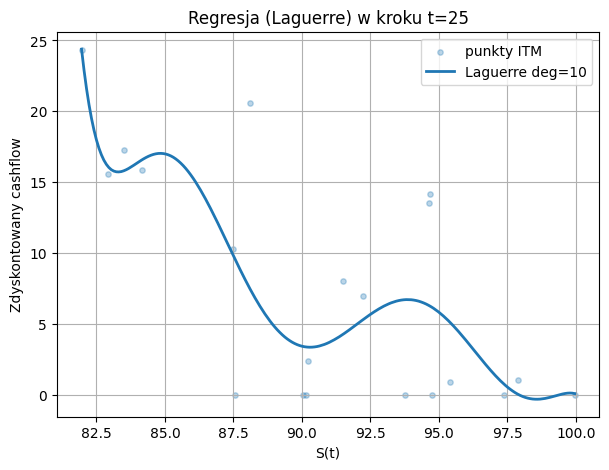

In [30]:
# +---------------------------------------------------------------------------+
# |   Komórka: regresja z bazą Laguerre’a (_build_basis_weighted_laguerre)    |
# +---------------------------------------------------------------------------+

poly_degree = 10
# 1) Budowa macierzy cech Laguerre’a
X_itm_lag = _build_basis_weighted_laguerre(S_itm, K=K, degree=poly_degree)
# 2) Dopasowanie modelu
model_lag = LinearRegression().fit(X_itm_lag, Y)
# 3) Predykcja na siatce cen
s_grid = np.linspace(S_itm.min(), S_itm.max(), 200).reshape(-1,1)
X_grid_lag = _build_basis_weighted_laguerre(s_grid, K=K, degree=poly_degree)
y_pred_lag = model_lag.predict(X_grid_lag)

# 4) Rysunek
plt.figure(figsize=(7,5))
plt.scatter(S_itm, Y, s=15, alpha=0.3, label='punkty ITM')
plt.plot(s_grid, y_pred_lag, linewidth=2, label=f'Laguerre deg={poly_degree}')
plt.title(f"Regresja (Laguerre) w kroku t={t}")
plt.xlabel("S(t)")
plt.ylabel("Zdyskontowany cashflow")
plt.legend()
plt.grid(True)
plt.show()


In [33]:

from lsm import (
    _build_basis,                     
    _build_basis_with_cross,           
    _build_basis_laguerre,             
    _build_basis_weighted_laguerre    
)


In [34]:

# Zakładamy, że S_itm, Y, K, t są już zdefiniowane jak w poprzednich komórkach
# Generujemy s_grid ponownie
s_grid = np.linspace(S_itm.min(), S_itm.max(), 200).reshape(-1,1)


In [68]:
poly_degree=5

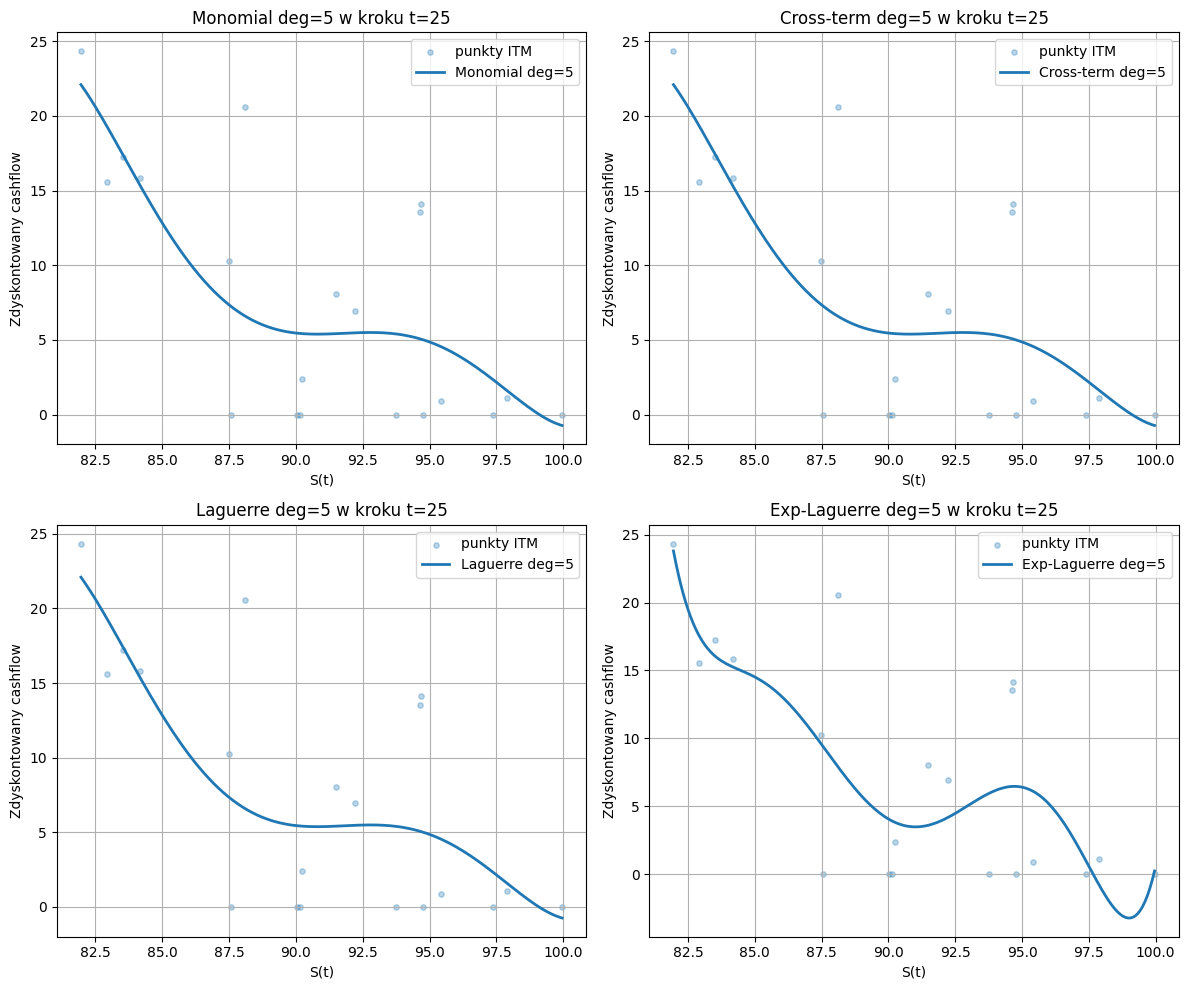

In [75]:

# Funkcja pomocnicza do dopasowania i predykcji
def fit_and_predict(basis_fn, label):
    X_itm = basis_fn(S_itm)
    model = LinearRegression().fit(X_itm, Y)
    X_grid = basis_fn(s_grid)
    return model.predict(X_grid), label

# Przygotowujemy listę metod
methods = [
    (lambda S: _build_basis(S,degree=poly_degree), f'Monomial deg={poly_degree}'),
    (lambda S: _build_basis_with_cross(S,degree=poly_degree), f'Cross-term deg={poly_degree}'),
    (lambda S: _build_basis_laguerre(S, K=K, degree=poly_degree), f'Laguerre deg={poly_degree}'),
    (lambda S: _build_basis_weighted_laguerre(S, K=K, degree=poly_degree), f'Exp-Laguerre deg={poly_degree}'),
]

# Dopasowujemy wszystkie metody
predictions = [fit_and_predict(fn, lbl) for fn, lbl in methods]
metrics   = pd.DataFrame( columns=['Method', 'R^2', 'MAE','MSE'])
metrics['Method'] = [lbl for _, lbl in predictions]
metrics

# Rysujemy 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (y_pred, lbl) in zip(axes, predictions):
    ax.scatter(S_itm, Y, s=15, alpha=0.3, label='punkty ITM')
    ax.plot(s_grid, y_pred, linewidth=2, label=lbl)
    ax.set_title(lbl + f" w kroku t={t}")
    ax.set_xlabel("S(t)")
    ax.set_ylabel("Zdyskontowany cashflow")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [76]:

results = []
for fn, lbl in methods:
    X_itm = fn(S_itm)
    model = LinearRegression().fit(X_itm, Y)
    Y_pred = model.predict(X_itm)
    results.append({
        "Method": lbl,
        "R2": r2_score(Y, Y_pred),
        "MSE": mean_squared_error(Y, Y_pred),
        "MAE": mean_absolute_error(Y, Y_pred)
    })

# Wyświetlenie w tabeli
df = pd.DataFrame(results)
display(df)

,Method,R2,MSE,MAE
0,Monomial deg=5,0.545129,29.063351,4.201873
1,Cross-term deg=5,0.545129,29.063351,4.201873
2,Laguerre deg=5,0.545130,29.063284,4.201372
3,Exp-Laguerre deg=5,0.583077,26.638692,3.949240
